## **1. 📦 Core Indicator Themes & Timing**

| Theme               | Indicator                                      | Timing     |
|---------------------|---------------------------------------------------------------------|------------|
| **Confidence**       | Consumer Confidence                            | Leading    |
|                     | Business Confidence                            | Leading    |
| **Labor Market**     | Total Jobs                                     | Coincident |
|                     | Unemployment Rate                              | Lagging    |
|                     | Labor Force Participation                      | Coincident |
| **Inflation**        | Consumer Price Index (CPI)                     | Lagging    |
|                     | Producer Price Index (PPI)                     | Leading    |
|                     | Crude Oil Prices                                | Leading    |
| **Interest Rates**   | Fed Funds Rate                                 | Lagging    |
|                     | Baa-Aaa Treasury Constant Maturity Rate        | Mixed      |
| **Real Economy**     | Housing Starts                                 | Leading    |
|                     | Durable Goods Orders                           | Leading    |
|                     | Capacity Utilization                           | Coincident |
| **Production**       | Industrial Production                          | Coincident |
| **Fiscal & Credit**  | Deficit as % of GDP                            | Lagging    |
|                     | Baa-Aaa Corporate Bond Yield                   | Lagging    |
|                     | Credit Conditions Subindex                      | Lagging    |
| **Liquidity**        | Real M2 Stocks                                 | Lagging    |
| **Sales/Inventory**  | Business Inventories                           | Lagging    |
|                     | Retail Sales                                   | Coincident |
| **Volatility**       | VIX (Volatility Index)                         | Leading    |

### All our Datasets

In [1194]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM JoblessClaims
LEFT JOIN BusinessConfidence ON JoblessClaims.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON JoblessClaims.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON JoblessClaims.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON JoblessClaims.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON JoblessClaims.observation_date = HousingStarts.observation_date
LEFT JOIN Volatility ON JoblessClaims.observation_date = Volatility.observation_date

WHERE JoblessClaims.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df

,observation_date,Jobless_Claims,observation_date,Business_Confidence_Index,observation_date,Consumer_Confidence_Index,observation_date,Credit_Conditions_Subindex,observation_date,Crude_Oil_Prices,observation_date,Housing_Starts,observation_date,Volatility_Index
0,1970-01-01,257077,1970-01-01,-2.6,1970-01-01,78.639130,None,NaN,1970-01-01,3.35,1970-01-01,1085,None,NaN
1,1970-04-01,310692,1970-04-01,-10.0,1970-04-01,76.310112,None,NaN,1970-04-01,3.35,1970-04-01,1264,None,NaN
2,1970-07-01,295923,1970-07-01,-1.0,1970-07-01,76.858696,None,NaN,1970-07-01,3.31,1970-07-01,1517,None,NaN
3,1970-10-01,322538,1970-10-01,-15.2,1970-10-01,74.152174,None,NaN,1970-10-01,3.31,1970-10-01,1580,None,NaN
4,1971-01-01,292692,1971-01-01,-4.2,1971-01-01,76.179348,1971-01-01,-1.15617,1971-01-01,3.56,1971-01-01,1828,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024-01-01,212154,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,13.71
217,2024-04-01,223615,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,13.98
218,2024-07-01,230769,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,17.07
219,2024-10-01,225462,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,17.36


In [1195]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Corporate_Bonds_df = pd.read_csv('Lagging/Baa_Aaa_Corporate_Bond_Yield.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Durable_Goods_df = pd.read_csv('Lagging/Durable_Goods.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Real_GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Unemployment_Rate_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
Treasury_Maturity_df.to_sql('TreasuryMaturity', conn, index=False, if_exists='replace')
Corporate_Bonds_df.to_sql('CorporateYield', conn, index=False, if_exists='replace')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Durable_Goods_df.to_sql('DurableGoods', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
Real_GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2_Stocks', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Unemployment_Rate_df.to_sql('Unemployment', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN TreasuryMaturity ON InterestRates.observation_date = TreasuryMaturity.observation_date
LEFT JOIN CorporateYield ON InterestRates.observation_date = CorporateYield.observation_date
LEFT JOIN CPI ON InterestRates.observation_date = CPI.observation_date
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
LEFT JOIN DurableGoods ON InterestRates.observation_date = DurableGoods.observation_date
LEFT JOIN GDP ON InterestRates.observation_date = GDP.observation_date
LEFT JOIN PPI ON InterestRates.observation_date = PPI.observation_date
LEFT JOIN M2_Stocks ON InterestRates.observation_date = M2_Stocks.observation_date
LEFT JOIN Inventories ON InterestRates.observation_date = Inventories.observation_date
LEFT JOIN Unemployment ON InterestRates.observation_date = Unemployment.observation_date

WHERE InterestRates.observation_date >= '1967-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df

,observation_date,Interest_Rates,observation_date,10Y_minus_2Y_Treasury_Constant_Maturity,observation_date,Corporate_Bond_Yield,observation_date,CPI,observation_date,Deficit_%_GDP,...,observation_date,GDP,observation_date,PPI,observation_date,M2_Money_Stocks,observation_date,Business_Inventories,observation_date,Unemployment_Rate
0,1967-01-01,4.82,None,NaN,None,None,1967-01-01,1.020,None,NaN,...,1967-01-01,4870.299,1967-01-01,1.51976,1967-01-01,1463.8,None,NaN,1967-01-01,3.9
1,1967-04-01,3.99,None,NaN,None,None,1967-04-01,0.820,None,NaN,...,1967-04-01,4873.287,1967-04-01,-0.30120,1967-04-01,1486.7,None,NaN,1967-04-01,3.8
2,1967-07-01,3.89,None,NaN,None,None,1967-07-01,0.950,None,NaN,...,1967-07-01,4919.392,1967-07-01,0.00000,1967-07-01,1515.9,None,NaN,1967-07-01,3.8
3,1967-10-01,4.17,None,NaN,None,None,1967-10-01,0.850,None,NaN,...,1967-10-01,4956.477,1967-10-01,0.00000,1967-10-01,1537.7,None,NaN,1967-10-01,4.0
4,1968-01-01,4.79,None,NaN,None,None,1968-01-01,1.200,None,NaN,...,1968-01-01,5057.553,1968-01-01,1.19760,1968-01-01,1546.6,None,NaN,1968-01-01,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01-01,5.33,2024-01-01,-0.26,None,None,2024-01-01,9.338,2024-01-01,-6.28002,...,2024-01-01,23053.545,2024-01-01,-3.42816,2024-01-01,6705.5,2024-01-01,2533439.0,2024-01-01,3.7
229,2024-04-01,5.33,2024-04-01,-0.33,None,None,2024-04-01,10.158,None,NaN,...,2024-04-01,23223.906,2024-04-01,0.02725,2024-04-01,6687.5,2024-04-01,2546223.0,2024-04-01,3.9
230,2024-07-01,5.26,2024-07-01,-0.25,None,None,2024-07-01,8.951,None,NaN,...,2024-07-01,23400.294,2024-07-01,1.37333,2024-07-01,6728.5,2024-07-01,2574892.0,2024-07-01,4.2
231,2024-10-01,4.65,2024-10-01,0.12,None,None,2024-10-01,7.911,None,NaN,...,2024-10-01,23542.349,2024-10-01,-0.82722,2024-10-01,6761.1,2024-10-01,2585582.0,2024-10-01,4.1


In [1196]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [1197]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')

Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [1198]:
import pandas as pd
import sqlite3

Capacity_Utilization_Growth_Rate_df= pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Capacity_Utilization_Growth_Rate_df['Capacity_Growth_Rate'] = Capacity_Utilization_Growth_Rate_df['Capacity_Utilization_Rate'].diff().round(2)
Capacity_Utilization_Growth_Rate_df

Total_Jobs_Added_df= pd.read_csv('Coincident/Total_Jobs.csv')
Total_Jobs_Added_df['Jobs_Added'] = Total_Jobs_Added_df['Total_Jobs'].diff()
Total_Jobs_Added_df

Unemployment_Rate_Change_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Unemployment_Rate_Change_df['Unemployment_Rate_Change'] = Unemployment_Rate_Change_df['Unemployment_Rate'].diff()
Unemployment_Rate_Change_df

Real_GDP_Growth_Rate_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_GDP_Growth_Rate_df['GDP_Growth_Rate'] = Real_GDP_Growth_Rate_df['GDP'].pct_change()*100
Real_GDP_Growth_Rate_df

Industrial_Production_Growth_Rate_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Industrial_Production_Growth_Rate_df['Industrial_Production_Growth'] = Industrial_Production_Growth_Rate_df['Industrial_Production_Index'].pct_change()*100
Industrial_Production_Growth_Rate_df

NBER_df = pd.read_csv('USREC.csv')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------

conn = sqlite3.connect(':memory:')

Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Real_GDP_Growth_Rate_df.to_sql('GDP', conn, index=False, if_exists='replace')
Industrial_Production_Growth_Rate_df.to_sql('IndProd', conn, index=False, if_exists='replace')


sql_query = """
SELECT GDP.observation_date, GDP_Growth_Rate, Unemployment_Rate_Change, Jobs_Added, Industrial_Production_Growth
FROM GDP
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN Jobs ON GDP.observation_date = Jobs.observation_date
LEFT JOIN IndProd ON GDP.observation_date = IndProd.observation_date
WHERE GDP.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Prediction_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Prediction_Indicators.csv"
Prediction_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth
0,1970-01-01,-0.148892,0.4,-65.0,-1.851756
1,1970-04-01,0.141718,0.2,-103.0,-0.257036
2,1970-07-01,0.921467,0.1,24.0,0.245536
3,1970-10-01,-1.071573,0.1,-423.0,-2.000423
4,1971-01-01,2.716149,-0.2,73.0,0.769402
...,...,...,...,...,...
215,2023-10-01,0.788673,0.1,186.0,-0.706624
216,2024-01-01,0.404802,-0.1,119.0,-1.118474
217,2024-04-01,0.738980,0.0,118.0,-0.157825
218,2024-07-01,0.759510,0.1,88.0,-0.711066


## 3. Regime Definition & Labeling


### 📊 Columns in Your Dataset:

From your dataset, we'll base the classification on:

- `GDP_Growth_Rate`
- `Unemployment_Rate_Change`
- `Jobs_Added`
- `Capacity_Growth_Rate`
- `Industrial_Production_Growth`

---

### 🧠 Thresholds (based on historical averages)

| Regime      | GDP Growth | Unemployment Δ | Jobs Added | Capacity Growth | IP Growth | Claims Δ |
|-------------|------------|----------------|------------|------------------|-----------|-----------|
| **Boom**    | > 0.7%     | < 0            | > +100k    | > 0.3%           | > 0.2%    | < 0       |
| **Neutral** | ~ 0.2–0.7% | ~ 0            | > 0        | > 0              | ~ 0%      | ~ 0       |
| **Slowdown**| 0–0.2%     | > 0.05%        | ~ 0        | ~ -0.2%          | ~ 0%      | > 10k     |
| **Recession**| < 0%      | > 0.2%         | < 0        | < -1%            | < 0%      | > 30k     |

---

In [1199]:
def classify_regime(row):
    gdp = row['GDP_Growth_Rate']
    unemp = row['Unemployment_Rate_Change']
    jobs = row['Jobs_Added']
    prod = row['Industrial_Production_Growth']

    # Recession scoring
    recession_score = 0
    recession_score += 3 if gdp < 0.5 else 0
    recession_score += 2 if unemp > 0.3 else 0
    recession_score += 3 if jobs < -75_000 else 0  # relaxed
    recession_score += 2 if prod < -0.3 else 0

    # Boom scoring
    boom_score = 0
    boom_score += 2 if gdp > 1.5 else 0  # relaxed
    boom_score += 2 if unemp < 0.1 else 0  # relaxed
    boom_score += 2 if jobs > 75_000 else 0  # relaxed
    boom_score += 1 if prod > 1.0 else 0  # relaxed

    if recession_score >= 4:
        return "Recession"
    elif boom_score >= 4:
        return "Boom"

    # Stable (no recession filter)
    stable_score = sum([
        0.7 < gdp <= 3.0,
        -0.1 <= unemp <= 0.2,
        30_000 < jobs <= 200_000,
        0.1 <= prod <= 2.2
    ])
    if stable_score >= 2 and not (prod < -0.4 and gdp < 0.8):
        return "Stable"

    return "mild"


# Apply to get True_Regime
Prediction_Indicators_df['Regime_Label'] = Prediction_Indicators_df.apply(classify_regime, axis=1)
Prediction_Indicators_df['Regime_Label'].value_counts()




Regime_Label
Stable       102
mild          59
Recession     32
Boom          27
Name: count, dtype: int64

## Historic Pattern Analysis (Retro)
- Build **pre-regime-transition snapshots** (1974-75, 1980, 1981-82, 1991, 2001, 2008, 2020)  
- Identify which indicators **change earliest** before downturns or recoveries  
- Use pattern recognition to validate labeling and feature design
✅ Ensures model is grounded in historical economic transitions.


In [1200]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')


# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')



# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1973-01-01'
AND Prediction_Indicator.observation_date <= '1974-01-01'
"""


# Run the query
Pre_1974_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1974_Recession.csv"
Pre_1974_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1974_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,1973-01-01,2.474942,-0.3,349.0,0.725121,Boom
1,1973-04-01,1.088743,0.1,171.0,-0.137577,Stable
2,1973-07-01,-0.525838,-0.1,26.0,0.370448,mild
3,1973-10-01,0.949231,-0.2,331.0,0.806741,Stable
4,1974-01-01,-0.859705,0.2,69.0,-0.664482,Recession


In [1201]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1979-04-01'
AND Prediction_Indicator.observation_date <= '1980-04-01'
"""

# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,1979-04-01,0.106745,0.0,-62.0,-1.180441,Recession
1,1979-07-01,0.742805,0.0,109.0,-0.161432,Stable
2,1979-10-01,0.250045,0.1,154.0,0.691558,Stable
3,1980-01-01,0.314571,0.3,128.0,0.531456,mild
4,1980-04-01,-2.060435,0.6,-145.0,-1.982205,Recession


In [1202]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1980-07-01'
AND Prediction_Indicator.observation_date <= '1981-07-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,1980-07-01,-0.118855,0.2,-261.0,-0.711736,Recession
1,1980-10-01,1.864923,0.0,277.0,1.270376,Boom
2,1981-01-01,1.959422,0.3,90.0,-0.632499,mild
3,1981-04-01,-0.741076,-0.2,73.0,-0.420748,Recession
4,1981-07-01,1.197502,-0.3,111.0,0.650995,Stable


In [1203]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1990-07-01'
AND Prediction_Indicator.observation_date <= '1991-07-01'
"""


# Run the query
Pre_1991_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1991_Recession.csv"
Pre_1991_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1991_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,1990-07-01,0.066582,0.3,-35.0,-0.166380,mild
1,1990-10-01,-0.910405,0.0,-146.0,-0.614784,Recession
2,1991-01-01,-0.467941,0.1,-110.0,-0.333341,Recession
3,1991-04-01,0.779689,-0.1,-218.0,0.257225,Stable
4,1991-07-01,0.505359,-0.1,-40.0,0.274080,mild


In [1204]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2000-04-01'
AND Prediction_Indicator.observation_date <= '2001-04-01'
"""

# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,2000-04-01,1.821288,-0.2,279.0,0.633016,Boom
1,2000-07-01,0.101933,0.0,166.0,-0.176878,mild
2,2000-10-01,0.597039,0.0,14.0,-0.368563,mild
3,2001-01-01,-0.327799,0.3,-13.0,-0.492606,Recession
4,2001-04-01,0.624503,0.1,-294.0,-0.351532,mild


In [1205]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2007-01-01'
AND Prediction_Indicator.observation_date <= '2008-01-01'
"""



# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,2007-01-01,0.300836,0.2,223.0,-0.357498,Recession
1,2007-04-01,0.611762,0.1,63.0,0.671092,Stable
2,2007-07-01,0.576026,0.1,-25.0,-0.156805,mild
3,2007-10-01,0.628237,0.0,76.0,-0.292517,mild
4,2008-01-01,-0.426764,0.0,-4.0,-0.124271,mild


In [1206]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2000-04-01'
AND Prediction_Indicator.observation_date <= '2001-04-01'
"""

# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,2000-04-01,1.821288,-0.2,279.0,0.633016,Boom
1,2000-07-01,0.101933,0.0,166.0,-0.176878,mild
2,2000-10-01,0.597039,0.0,14.0,-0.368563,mild
3,2001-01-01,-0.327799,0.3,-13.0,-0.492606,Recession
4,2001-04-01,0.624503,0.1,-294.0,-0.351532,mild


### Determine the Early Movers Before Each Recession

Insights:
- Jobless Claims is a consistent early warning signal (in every recession except 1991).
- Industrial Production and Capacity often dip well before GDP or Jobs fall.
- Unemployment Rate changes are more visible closer to the recession start (2001, 2008).
- 1991 recession may have had a more sudden onset or lag in available data signals.

## Data Preparation
- Convert all indicators to **quarterly format**  
- Apply **z-score normalization**  
- Analyze regime-specific trends over time  
- Run **PCA or TSNE** to explore regime separability  
- Visualize regime boundaries via scatter plots or clusters

In [1207]:
from sklearn.preprocessing import StandardScaler

Prediction_Indicators_df['label_regime'] = Prediction_Indicators_df.apply(classify_regime, axis=1)

features = ['GDP_Growth_Rate', 'Unemployment_Rate_Change', 'Jobs_Added', 'Industrial_Production_Growth']

scaler = StandardScaler()

Prediction_Indicators_df[features] = scaler.fit_transform(Prediction_Indicators_df[features])


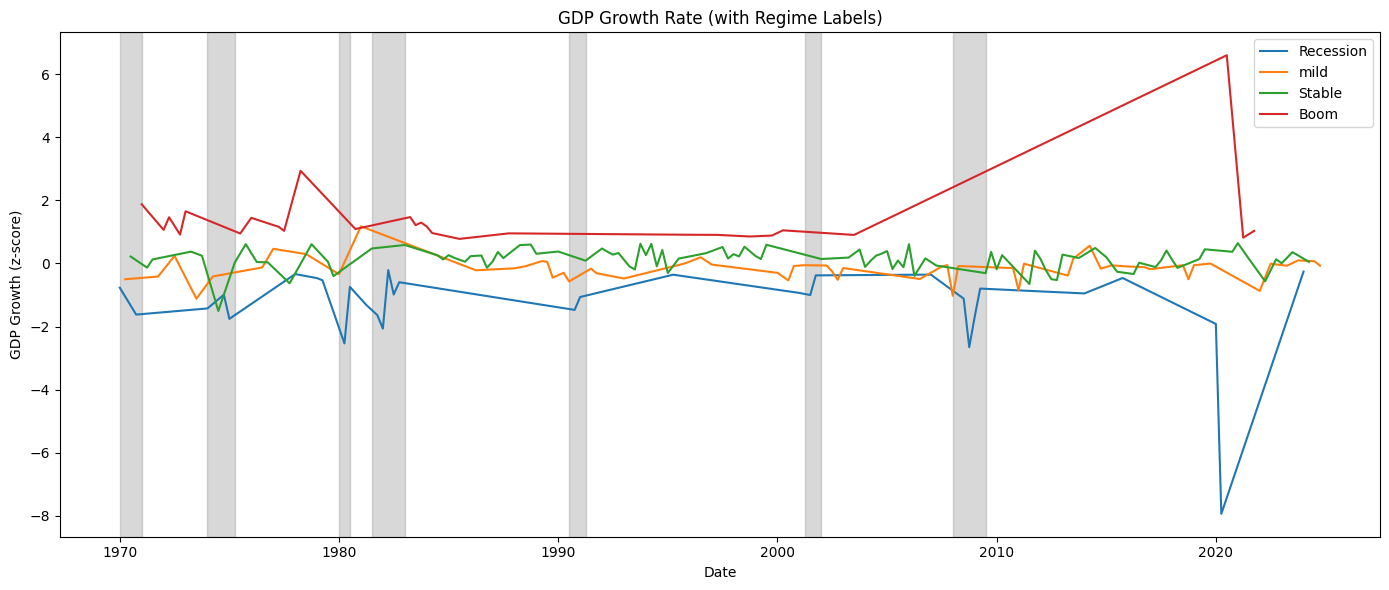

In [1208]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='GDP_Growth_Rate', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('GDP Growth Rate (with Regime Labels)')
plt.xlabel('Date')
plt.ylabel('GDP Growth (z-score)')
plt.legend()
plt.tight_layout()
plt.show()



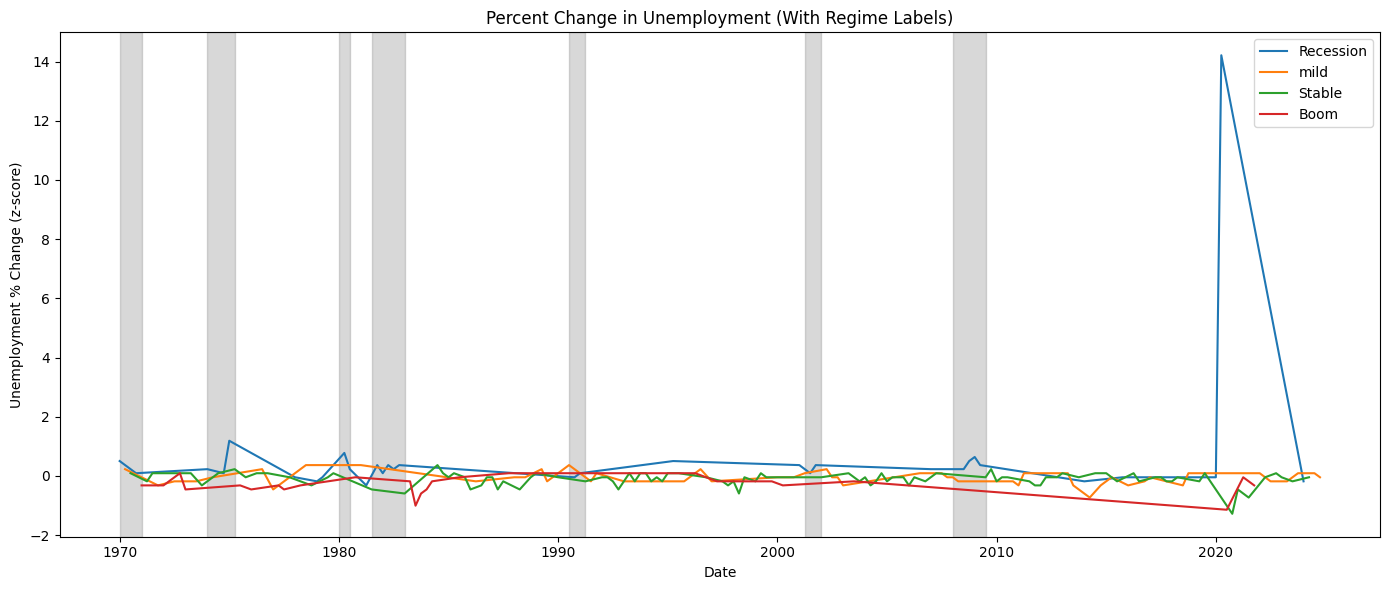

In [1209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Unemployment_Rate_Change', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Percent Change in Unemployment (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Unemployment % Change (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


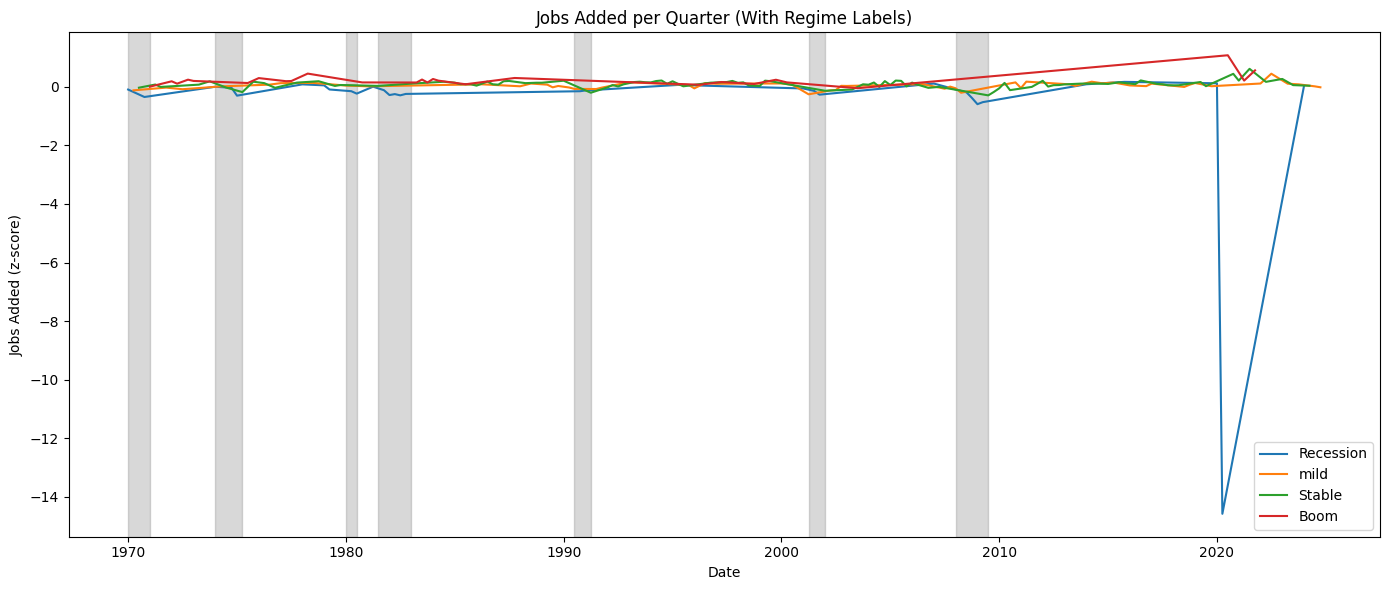

In [1210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Jobs_Added', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Jobs Added per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Jobs Added (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

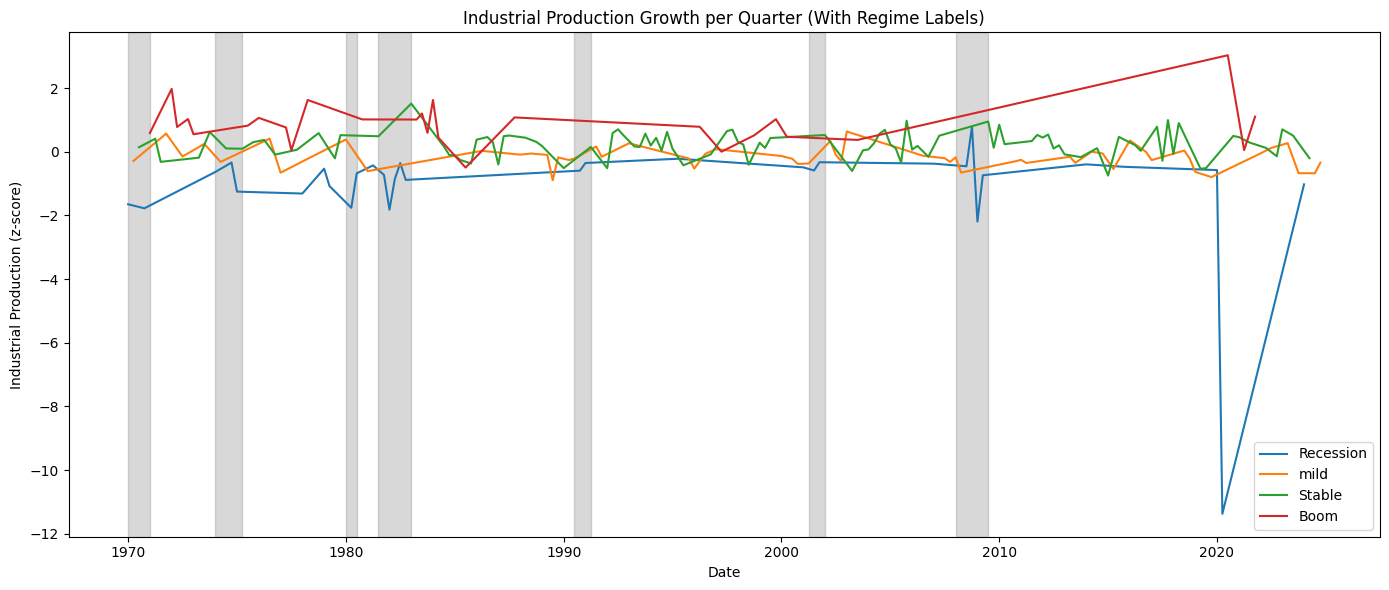

In [1211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Industrial_Production_Growth', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Industrial Production Growth per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Industrial Production (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

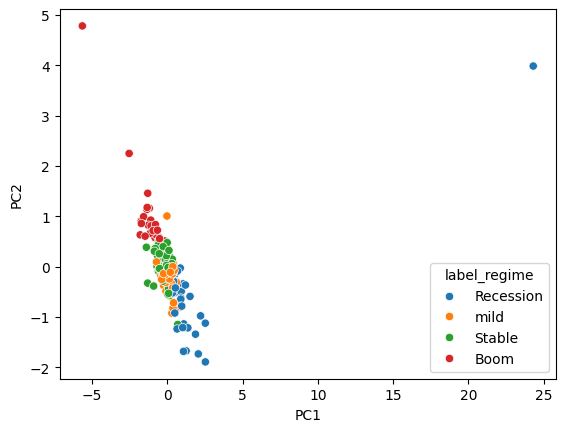

In [1212]:
from sklearn.decomposition import PCA

X = Prediction_Indicators_df[features]
pca = PCA(n_components=2)
Prediction_Indicators_df[['PC1', 'PC2']] = pca.fit_transform(X)

sns.scatterplot(data=Prediction_Indicators_df, x='PC1', y='PC2', hue='label_regime')


## **EDA+Feature Engineeing**

In [1213]:
import pandas as pd
import sqlite3

def drop_duplicate_columns(df):
    return df.loc[:, ~df.columns.duplicated()]
    
Lagging_Indicators_df = drop_duplicate_columns(Lagging_Indicators_df)
Leading_Indicators_df = drop_duplicate_columns(Leading_Indicators_df)
Coincident_Indicators_df = drop_duplicate_columns(Coincident_Indicators_df)


conn = sqlite3.connect(':memory:')

Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')


sql_query = """
SELECT *
FROM Lagging
LEFT JOIN Leading ON Lagging.observation_date = Leading.observation_date
LEFT JOIN Coincident ON Lagging.observation_date = Coincident.observation_date
WHERE Lagging.observation_date >= '1976-01-01'
"""

# Execute the query and load results into a DataFrame
All_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "All_Indicators.csv"
All_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
All_Indicators_df

,observation_date,Interest_Rates,10Y_minus_2Y_Treasury_Constant_Maturity,Corporate_Bond_Yield,CPI,Deficit_%_GDP,Durable_Good_Orders,GDP,PPI,M2_Money_Stocks,...,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Capacity_Utilization_Rate,Industrial_Production_Index,Labor_Force_Participation,Total_Retail_Sales,Total_Jobs
0,1976-01-01,4.83,NaN,None,3.500,-3.935710,NaN,6323.649,4.35540,1839.8,...,-2.05371,11.16,1367,NaN,1976-01-01,78.9586,42.9082,61.3,NaN,78503.0
1,1976-04-01,5.20,NaN,None,3.100,-3.596157,NaN,6370.025,5.39130,1890.9,...,-2.21140,12.17,1395,NaN,1976-04-01,79.5007,43.6518,61.6,NaN,79292.0
2,1976-07-01,5.28,0.98,None,3.000,-3.256605,NaN,6404.895,4.94037,1905.8,...,-1.97208,12.17,1401,NaN,1976-07-01,80.0430,44.1248,61.8,NaN,79547.0
3,1976-10-01,4.87,1.43,None,3.000,-2.917053,NaN,6451.177,3.51171,1943.0,...,-1.56955,13.90,1629,NaN,1976-10-01,80.9266,44.5600,61.6,NaN,79911.0
4,1977-01-01,4.66,1.31,None,2.900,-2.577500,NaN,6527.703,4.84140,1985.0,...,-1.73878,13.90,1527,NaN,1977-01-01,81.9391,45.4156,61.6,NaN,80690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2024-01-01,5.33,-0.26,None,9.338,-6.280020,279500.0,23053.545,-3.42816,6705.5,...,-0.01606,74.15,1376,13.71,2024-01-01,77.7036,101.4830,62.5,224062.0,157049.0
193,2024-04-01,5.33,-0.33,None,10.158,NaN,276422.0,23223.906,0.02725,6687.5,...,-0.04506,85.35,1377,13.98,2024-04-01,77.9731,102.3568,62.7,224487.0,157635.0
194,2024-07-01,5.26,-0.25,None,8.951,NaN,287427.0,23400.294,1.37333,6728.5,...,-0.03644,81.80,1262,17.07,2024-07-01,77.6310,102.5192,62.7,226699.0,158003.0
195,2024-10-01,4.65,0.12,None,7.911,NaN,282571.0,23542.349,-0.82722,6761.1,...,-0.08510,71.99,1344,17.36,2024-10-01,77.1891,102.2669,62.5,228287.0,158358.0


### Temporal Features
- Create 1–4 quarter lags per indicator  
- Add rolling stats (mean, % change, std dev)

In [1214]:
import pandas as pd
# Drop duplicate columns based on column name
All_Indicators_df = All_Indicators_df.loc[:, ~All_Indicators_df.columns.duplicated()]


# Ensure Date is datetime and sorted
All_Indicators_df.loc[:, 'observation_date'] = pd.to_datetime(All_Indicators_df['observation_date'])
All_Indicators_df = All_Indicators_df.sort_values('observation_date')
All_Indicators_df = All_Indicators_df.set_index('observation_date')

# Example indicators
indicators = ['CPI', 'M2_Money_Stocks', 'Jobless_Claims', 'Business_Confidence_Index', 'Consumer_Confidence_Index', 'Credit_Conditions_Subindex', 'Housing_Starts', 'Labor_Force_Participation', 'Interest_Rates', 'Deficit_%_GDP', 'Capacity_Utilization_Rate' ]  # modify to match your real column names

# 1. Add 1–4 quarter lags
for col in indicators:
    for lag in range(1, 5):
        All_Indicators_df[f'{col}_lag{lag}'] = All_Indicators_df[col].shift(lag)

window = 4
for col in indicators:
    All_Indicators_df[f'{col}_roll_mean'] = All_Indicators_df[col].rolling(window).mean()
    All_Indicators_df[f'{col}_roll_std'] = All_Indicators_df[col].rolling(window).std()
    All_Indicators_df[f'{col}_pct_change'] = All_Indicators_df[col].pct_change(periods=window)

new_cols = [col for col in All_Indicators_df.columns if any(suffix in col for suffix in ['_lag', '_roll_mean', '_roll_std', '_pct_change'])]
All_Indicators_df[new_cols]

Lags_df = pd.read_csv('Lags.csv')

Lags_df


,observation_date,CPI_lag1,CPI_lag2,CPI_lag3,CPI_lag4,M2_Money_Stocks_lag1,M2_Money_Stocks_lag2,M2_Money_Stocks_lag3,M2_Money_Stocks_lag4,Jobless_Claims_lag1,...,Labor_Force_Participation_pct_change,Interest_Rates_roll_mean,Interest_Rates_roll_std,Interest_Rates_pct_change,Deficit_%_GDP_roll_mean,Deficit_%_GDP_roll_std,Deficit_%_GDP_pct_change,Capacity_Utilization_Rate_roll_mean,Capacity_Utilization_Rate_roll_std,Capacity_Utilization_Rate_pct_change
0,1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-04-01,3.500,NaN,NaN,NaN,1839.8,NaN,NaN,NaN,360846.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-07-01,3.100,3.500,NaN,NaN,1890.9,1839.8,NaN,NaN,385692.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1976-10-01,3.000,3.100,3.500,NaN,1905.8,1890.9,1839.8,NaN,395231.0,...,NaN,5.0450,0.228108,NaN,-3.426381,0.438360,NaN,79.857225,0.839189,NaN
4,1977-01-01,3.000,3.000,3.100,3.500,1943.0,1905.8,1890.9,1839.8,392154.0,...,0.004894,5.0025,0.289180,-0.035197,-3.086829,0.438360,-0.345099,80.602350,1.067480,0.037748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2024-01-01,9.674,9.675,14.276,17.914,6724.2,6819.2,6844.8,7057.6,211538.0,...,0.001603,5.2275,0.161735,0.181818,-6.218299,0.053121,0.026914,78.509725,0.649037,-0.023820
193,2024-04-01,9.338,9.674,9.675,14.276,6705.5,6724.2,6819.2,6844.8,212154.0,...,0.001597,5.3125,0.035000,0.068136,NaN,NaN,0.020051,78.220950,0.527775,-0.014598
194,2024-07-01,10.158,9.338,9.674,9.675,6687.5,6705.5,6724.2,6819.2,223615.0,...,0.001597,5.3125,0.035000,0.000000,NaN,NaN,0.013278,77.896075,0.293282,-0.016464
195,2024-10-01,8.951,10.158,9.338,9.674,6728.5,6687.5,6705.5,6724.2,230769.0,...,-0.003190,5.1425,0.329987,-0.127580,NaN,NaN,0.006595,77.624200,0.325266,-0.013893


## Derived features

| Feature | Formula |
|--------|---------|
| **Fiscal Stress Index** | Deficit % GDP × Interest Rate |
| **Inflation Gap** | PPI – CPI |
| **Jobs Momentum** | ΔJobs / ΔUnemployment |
| **Inventory Ratio** | Inventories ÷ Retail Sales |
| **Volatility Shock** | QoQ % Change in VIX |
| **Liquidity Shock** | ΔReal M2 QoQ |
| **Treasury Maturity Shock** | ΔTreasury QoQ |

In [1215]:
import pandas as pd
import numpy as np
import sqlite3

# Load required datasets
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Total_Jobs_Added_df = pd.read_csv('Prediction_Indicators.csv')
Unemployment_Rate_Change_df = pd.read_csv('Prediction_Indicators.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')

# -----------------------------------------------------
# Fiscal Stress Index
conn = sqlite3.connect(':memory:')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

sql_query = """
SELECT InterestRates.observation_date, InterestRates.Interest_Rates, DeficitGDP."Deficit_%_GDP"
FROM InterestRates
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1970-01-01'
"""
Fisical_Stress_Index_df = pd.read_sql_query(sql_query, conn)
Fisical_Stress_Index_df['Fisical_Stress_Index'] = (
    Fisical_Stress_Index_df['Deficit_%_GDP'] * Fisical_Stress_Index_df['Interest_Rates']
)
conn.close()

# -----------------------------------------------------
# Inflation Gap
conn = sqlite3.connect(':memory:')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

sql_query = """
SELECT CPI.observation_date, CPI.CPI, PPI.PPI
FROM CPI
LEFT JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1970-01-01'
"""
Inflation_Gap_df = pd.read_sql_query(sql_query, conn)
Inflation_Gap_df['Inflation_Gap'] = Inflation_Gap_df['PPI'] - Inflation_Gap_df['CPI']
conn.close()

# -----------------------------------------------------
# Jobs Momentum (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

sql_query = """
SELECT Jobs.observation_date, Jobs.Jobs_Added, Unemployment.Unemployment_Rate_Change
FROM Jobs
LEFT JOIN Unemployment ON Jobs.observation_date = Unemployment.observation_date
WHERE Jobs.observation_date >= '1970-01-01'
"""
Jobs_Momentum_df = pd.read_sql_query(sql_query, conn)
Jobs_Momentum_df['Jobs_Momentum'] = np.where(
    Jobs_Momentum_df['Unemployment_Rate_Change'] == 0,
    0,
    Jobs_Momentum_df['Jobs_Added'] / Jobs_Momentum_df['Unemployment_Rate_Change']
)
conn.close()

# -----------------------------------------------------
# Inventories-to-Sales Ratio (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Sales', conn, index=False, if_exists='replace')

sql_query = """
SELECT Sales.observation_date, Sales.Total_Retail_Sales, Inventories.Business_Inventories
FROM Sales
LEFT JOIN Inventories ON Sales.observation_date = Inventories.observation_date
WHERE Sales.observation_date >= '1992-01-01'
"""
Inventories_to_Sales_Ratio_df = pd.read_sql_query(sql_query, conn)
Inventories_to_Sales_Ratio_df['Inventories_to_Sales_Ratio'] = np.where(
    Inventories_to_Sales_Ratio_df['Total_Retail_Sales'] == 0,
    0,
    Inventories_to_Sales_Ratio_df['Business_Inventories'] / Inventories_to_Sales_Ratio_df['Total_Retail_Sales']
)
conn.close()
# -----------------------------------------------------
# Volatility Shock
Volatility_Index_df['Volatility_Index_Growth_Rate'] = Volatility_Index_df[
    'Volatility_Index'
].pct_change() * 100

# -----------------------------------------------------
# Liquidity Shock
Real_M2_Stocks_df['M2_Money_Stocks_Change'] = Real_M2_Stocks_df[
    'M2_Money_Stocks'
].diff().round(2)

# -----------------------------------------------------
# Treasury Shock
Treasury_Maturity_df['Change_in_Treasury_Rate'] = Treasury_Maturity_df[
    '10Y_minus_2Y_Treasury_Constant_Maturity'
].diff().round(2)

# Now combine all derived indicators on observation_date
combined_df = Fisical_Stress_Index_df[['observation_date', 'Fisical_Stress_Index']] \
    .merge(Inflation_Gap_df[['observation_date', 'Inflation_Gap']], on='observation_date', how='outer') \
    .merge(Jobs_Momentum_df[['observation_date', 'Jobs_Momentum']], on='observation_date', how='outer') \
    .merge(Real_M2_Stocks_df[['observation_date', 'M2_Money_Stocks_Change']], on='observation_date', how='outer') \
    .merge(Treasury_Maturity_df[['observation_date', 'Change_in_Treasury_Rate']], on='observation_date', how='outer')

combined_df


,observation_date,Fisical_Stress_Index,Inflation_Gap,Jobs_Momentum,M2_Money_Stocks_Change,Change_in_Treasury_Rate
0,1970-01-01,-2.266602,2.68506,-162.5,-3.7,NaN
1,1970-04-01,-5.460269,2.04929,-515.0,-5.1,NaN
2,1970-07-01,-7.522346,1.53128,240.0,6.1,NaN
3,1970-10-01,-8.629058,1.24262,-4230.0,5.3,NaN
4,1971-01-01,-7.632532,0.19178,-365.0,12.1,NaN
...,...,...,...,...,...,...
790,1969-09-01,NaN,NaN,NaN,-3.1,NaN
791,1969-10-01,NaN,NaN,NaN,-4.9,NaN
792,1969-11-01,NaN,NaN,NaN,-3.0,NaN
793,1969-12-01,NaN,NaN,NaN,-1.7,NaN


## Modeling

In [1216]:
Regime_label_df = pd.read_csv('Regime_Labels.csv')

conn = sqlite3.connect(':memory:')

combined_df.to_sql('Combined', conn, index=False, if_exists='replace')
Lags_df.to_sql('Lags', conn, index=False, if_exists='replace')
Regime_label_df.to_sql('Prediction', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM Combined
LEFT JOIN Lags ON Combined.observation_date = Lags.observation_date
LEFT JOIN Prediction ON Combined.observation_date = Prediction.observation_date
WHERE Combined.observation_date >= '1976-01-01'
"""
# Execute query and load result into DataFrame
Modeling_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "All_for_Modeling.csv"
Modeling_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

In [1217]:
Modeling_df.dtypes

observation_date                 object
Fisical_Stress_Index            float64
Inflation_Gap                   float64
Jobs_Momentum                   float64
M2_Money_Stocks_Change          float64
                                 ...   
GDP_Growth_Rate                 float64
Unemployment_Rate_Change        float64
Jobs_Added                      float64
Industrial_Production_Growth    float64
Regime_Label                     object
Length: 90, dtype: object

In [1218]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset again
df = pd.read_csv("All_for_Modeling.csv")

# Select and clean numeric features
X = df.select_dtypes(include=['number']).drop(columns=["observation_date"], errors='ignore')
X = X.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Clean and filter target (keep all non-null labels)
y = df["Regime_Label"].loc[X_imputed.index]
mask = y.notna()
X_imputed = X_imputed.loc[mask]
y = y.loc[mask]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)


# Model setup
model = XGBClassifier(
    max_depth=3,
    min_child_weight=3,
    gamma=0.5,
    subsample=0.7,
    colsample_bytree=0.7,
    n_estimators=150,
    learning_rate=0.2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
all_classes = le.classes_
all_class_indices = list(range(len(all_classes)))
report = classification_report(
    y_test, y_pred,
    labels=all_class_indices,
    target_names=all_classes,
    zero_division=0,
    output_dict=True
)
cm = confusion_matrix(y_test, y_pred, labels=all_class_indices)

# Output report
report_df = pd.DataFrame(report).transpose().round(3)
print("\nClassification Report:")
print(report_df)

print("\nConfusion Matrix:")
print(cm)



Classification Report:
              precision  recall  f1-score  support
Boom              0.000   0.000     0.000      0.0
Recession         1.000   0.667     0.800      6.0
Stable            0.840   0.913     0.875     23.0
mild              0.636   0.636     0.636     11.0
micro avg         0.800   0.800     0.800     40.0
macro avg         0.619   0.554     0.578     40.0
weighted avg      0.808   0.800     0.798     40.0

Confusion Matrix:
[[ 0  0  0  0]
 [ 0  4  0  2]
 [ 0  0 21  2]
 [ 0  0  4  7]]



SHAP Summary for class: Boom


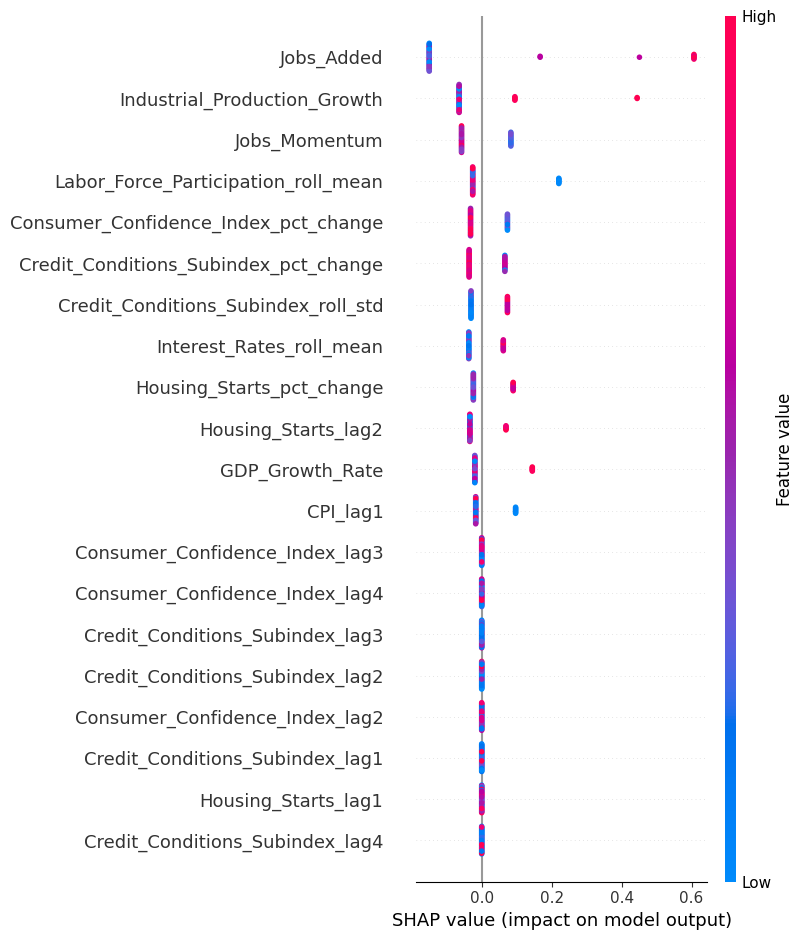


SHAP Summary for class: Recession


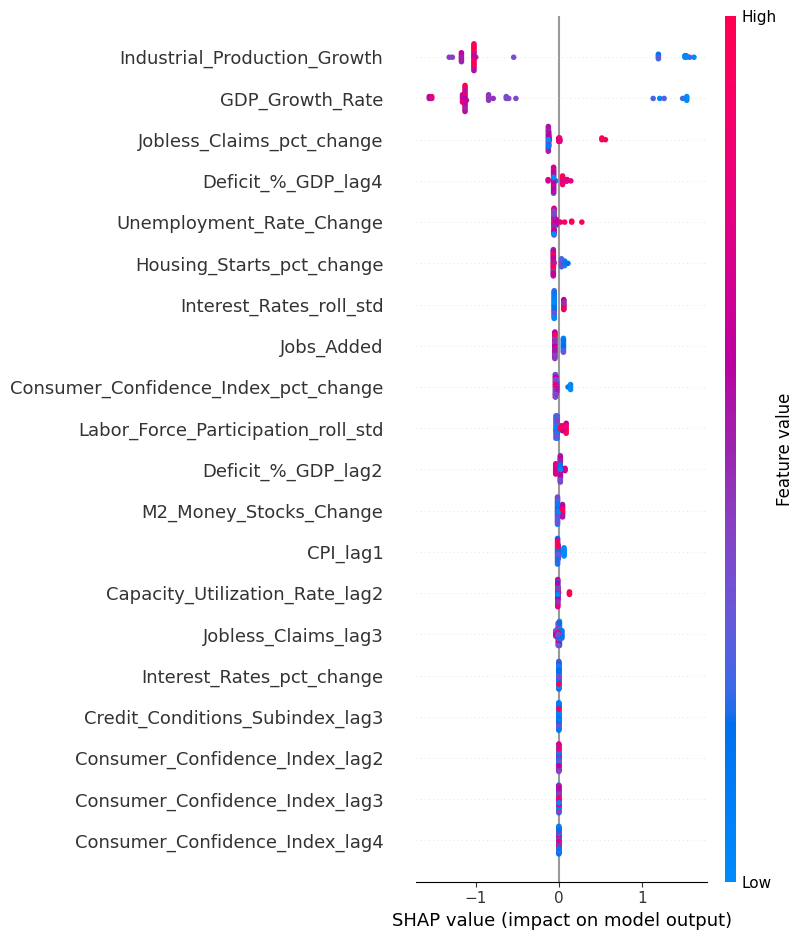


SHAP Summary for class: Stable


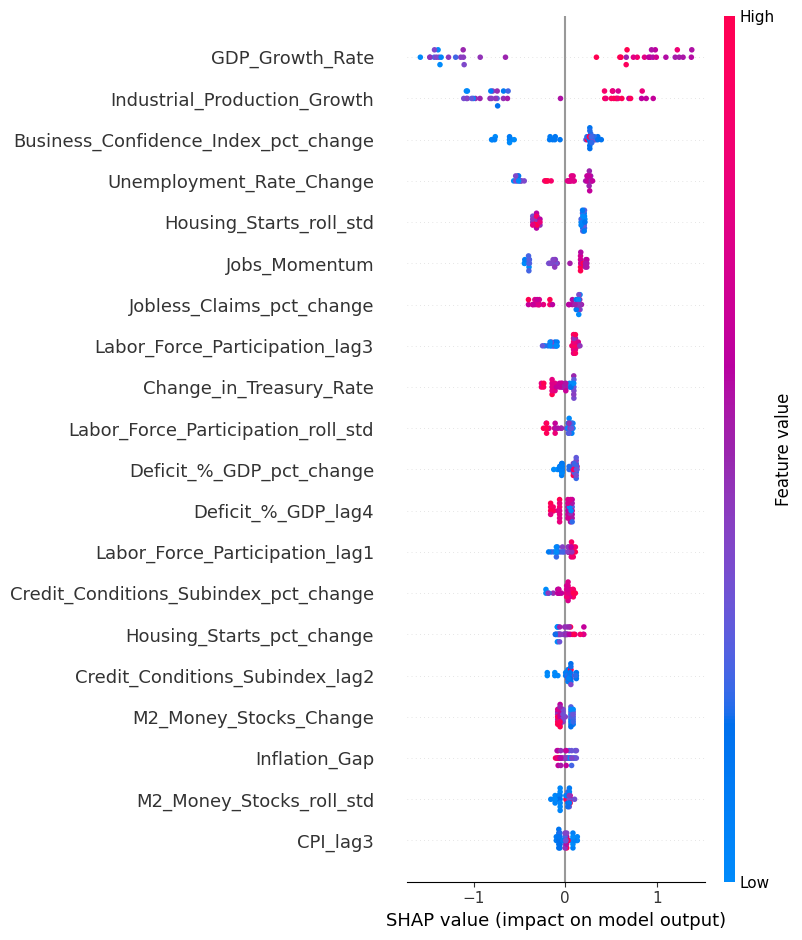


SHAP Summary for class: mild


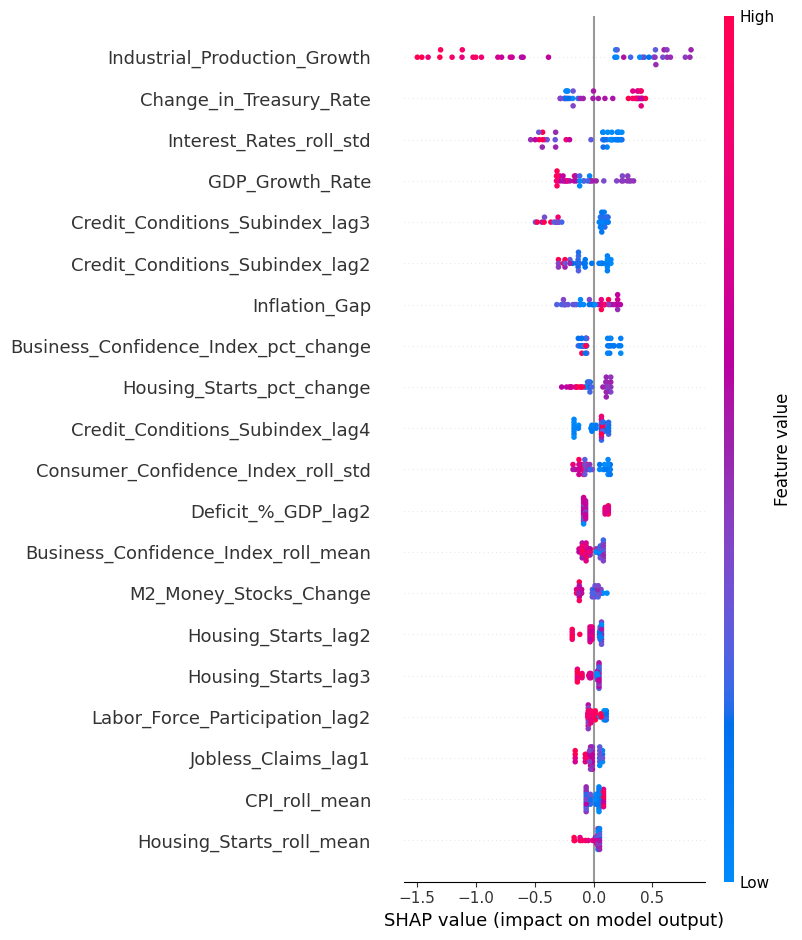

In [1219]:
import shap
import matplotlib.pyplot as plt

# Create SHAP TreeExplainer (legacy-compatible, best for XGBoost)
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary (beeswarm) for multiclass: specify which class to plot
# Example: shap_values[0] for class 0, shap_values[1] for class 1, etc.
# You can loop through them or pick the most common class
for i, class_name in enumerate(le.classes_):
    print(f"\nSHAP Summary for class: {class_name}")
    shap.summary_plot(shap_values[i], X_test, plot_type="dot", show=True)
